In [1]:
from dotenv import load_dotenv
load_dotenv()

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro")

In [43]:
response = llm.invoke("The opposite of hot is")

response.content

'cold'

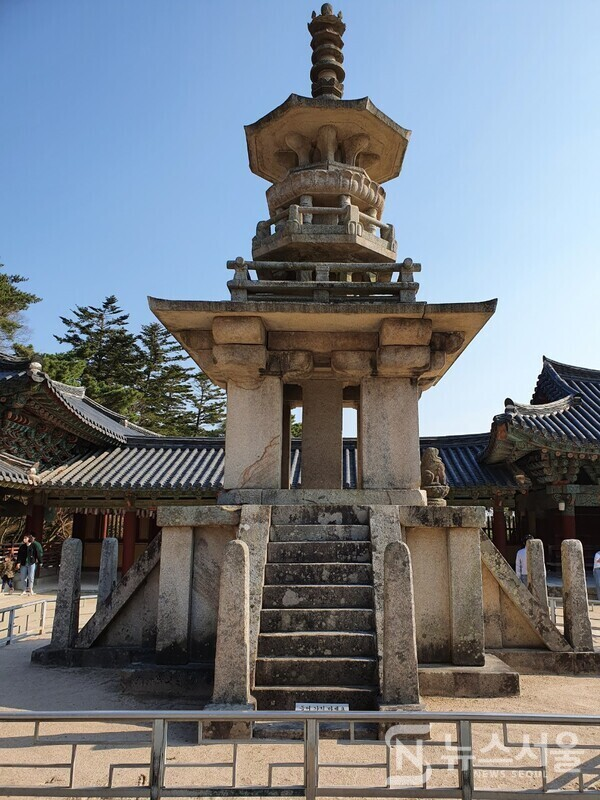

In [8]:
from IPython.display import Image
import requests

image_url = "https://newsseoul.co.kr/news/data/20220413/p179587804509378_114.jpg"
content = requests.get(image_url).content
Image(content)

In [50]:
from langchain_core.messages import SystemMessage

system_msg = SystemMessage(content=[
  {
    "type": "text",
    "text": "주어진 이미지 URL을 통해 해당 이미지가 어떤 역사적인 유물이나 장소를 말하는지 정확히 알려준다."
  }
])
system_msg

SystemMessage(content=[{'type': 'text', 'text': '주어진 이미지 URL을 통해 해당 이미지가 어떤 역사적인 유물이나 장소를 말하는지 정확히 알려준다.'}])

In [52]:
from langchain_core.messages import HumanMessage
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "이미지가 어떤 역사적인 유물인지 명칭을 정확히 알려줘",
        },
        {"type": "image_url", "image_url": image_url},
    ]
)
message
# llm.invoke([message])

HumanMessage(content=[{'type': 'text', 'text': '이미지가 어떤 역사적인 유물인지 명칭을 정확히 알려줘'}, {'type': 'image_url', 'image_url': 'https://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&parentSn=31638&fileTy=MEDIA&fileNo=1'}])

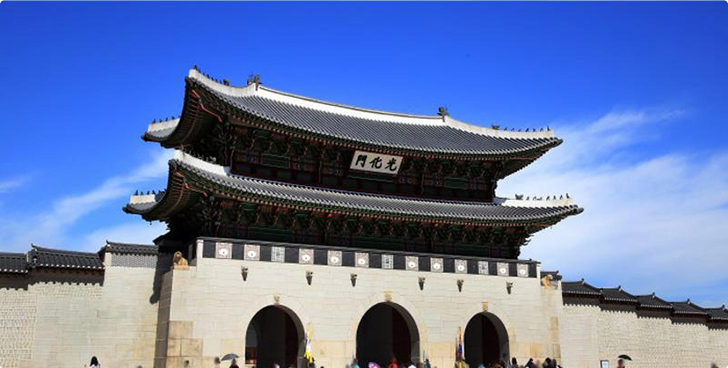

In [10]:
image_url = "https://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&parentSn=31638&fileTy=MEDIA&fileNo=1"
content = requests.get(image_url).content
Image(content)

In [18]:
from langchain_core.messages import HumanMessage
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision", temperature=0.1)
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "이미지가 어떤 역사적인 유물인지 명칭을 정확히 알려줘!",
        },
        {"type": "image_url", "image_url": image_url},
    ]
)
llm.invoke([message])

AIMessage(content=' 서울특별시 종로구에 있는 대한민국의 국보 제1호로, 조선왕조의 정궁이었던 경복궁의 정문이다. 경복궁은 조선 태조 4년(1395년)에 완성된 이후 500여 년 동안 조선의 중심지였으나 임진왜란(1592년)으로 불타 없어졌다. 경복궁은 일제강점기인 1911년부터 1926년까지 복원되었고, 현재는 관광지로 개방되어 있다.')

In [12]:
from langchain_core.messages import HumanMessage
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "이미지의 역사적인 설명을 초등학생이 알아듣기 쉽게 선생님의 역할로써 학생에게 설명해줘",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)
llm.invoke([message])

AIMessage(content=' 이미지는 경복궁의 광화문입니다. 경복궁은 조선왕조의 첫 번째 왕궁으로, 1395년에 건축되었습니다. 광화문은 경복궁의 정문으로, 1412년에 건축되었습니다. 광화문은 한국의 전통 건축 양식을 잘 보여주는 건물입니다. 광화문은 높이가 11.8미터, 너비가 12.4미터입니다. 광화문은 2001년에 복원되었습니다.')

In [14]:
from langchain.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())
wikipedia.run("경복궁")

"Page: Gyeongbokgung\nSummary: Gyeongbokgung (Korean: 경복궁; Hanja: 景福宮; lit. Blessing Scenery Palace), also known as Gyeongbokgung Palace, was the main royal palace of the Joseon dynasty. Built in 1395, it is located in northern Seoul, South Korea. The largest of the Five Grand Palaces built by the Joseon dynasty, Gyeongbokgung served as the home of the royal family and the seat of government.\nGyeongbokgung continued to serve as the main palace of the Joseon dynasty until the premises were destroyed by fire during the Imjin War (1592–1598) and abandoned for two centuries. However, in the 19th century, all of the palace's 7,700 rooms were restored under the leadership of Prince Regent Heungseon during the reign of King Gojong. Some 500 buildings were restored on a site of over 40 hectares.  The architectural principles of ancient Korea were incorporated into the tradition and appearance of the Joseon royal court.\nIn the early 20th century, much of the palace was systematically destroye

In [ ]:
from langchain_core.messages import HumanMessage
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision", temperature=0.1)
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "이미지가 어떤 역사적인 유물인지 명칭을 정확히 알려줘!",
        },
        {"type": "image_url", "image_url": image_url},
    ]
)


In [19]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
# The schema I want out
response_schemas = [
    ResponseSchema(name="object", description="The name of the image object"),
    ResponseSchema(name="description", description="The description of the image object"),
]

# The parser that will look for the LLM output in my schema and return it back to me
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

format_instructions = output_parser.get_format_instructions()

print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"object": string  // The name of the image object
	"description": string  // The description of the image object
}
```


In [30]:


from langchain.schema import HumanMessage
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate

prompt = ChatPromptTemplate(
    messages=[
        HumanMessagePromptTemplate.from_template("Given content from the user, extract the object and description \n \
                                                    {format_instructions}\n{user_prompt}")  
    ],
    input_variables=["user_prompt"],
    partial_variables={"format_instructions": format_instructions}
)

In [31]:
from langchain_core.messages import HumanMessage
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision", temperature=0.1)
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "이미지가 어떤 역사적인 유물인지 명칭을 정확히 알려줘!",
        },
        {"type": "image_url", "image_url": image_url},
    ]
)
result = llm.invoke([message])
query = prompt.format_prompt(user_prompt=result)

In [32]:
print (query.messages[0].content)

Given content from the user, extract the object and description 
                                                     The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"object": string  // The name of the image object
	"description": string  // The description of the image object
}
```
content=' 서울특별시 종로구에 있는 대한민국의 국보 제1호로, 조선왕조의 정궁이었던 경복궁의 정문이다. 경복궁은 조선 태조 4년(1395년)에 완성된 이후 500여 년 동안 조선의 중심지였으나, 임진왜란(1592년)으로 불타 없어졌다. 경복궁은 1867년 고종 때에 중건되었으나, 1911년 일제에 의해 다시 파괴되었다. 현재 경복궁은 일제에 의해 파괴된 것을 복원한 것이다.'


In [34]:
from langchain.chat_models import ChatOpenAI

chat_model = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo')

fruit_output = chat_model(query.to_messages())
# fruit_output
output = output_parser.parse(fruit_output.content)

print (output)

{'object': '경복궁의 정문', 'description': '서울특별시 종로구에 있는 대한민국의 국보 제1호로, 조선왕조의 정궁이었던 경복궁의 정문이다. 경복궁은 조선 태조 4년(1395년)에 완성된 이후 500여 년 동안 조선의 중심지였으나, 임진왜란(1592년)으로 불타 없어졌다. 경복궁은 1867년 고종 때에 중건되었으나, 1911년 일제에 의해 다시 파괴되었다. 현재 경복궁은 일제에 의해 파괴된 것을 복원한 것이다.'}


In [39]:
query.to_messages()

[HumanMessage(content='Given content from the user, extract the object and description \n                                                     The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":\n\n```json\n{\n\t"object": string  // The name of the image object\n\t"description": string  // The description of the image object\n}\n```\ncontent=\' 서울특별시 종로구에 있는 대한민국의 국보 제1호로, 조선왕조의 정궁이었던 경복궁의 정문이다. 경복궁은 조선 태조 4년(1395년)에 완성된 이후 500여 년 동안 조선의 중심지였으나, 임진왜란(1592년)으로 불타 없어졌다. 경복궁은 1867년 고종 때에 중건되었으나, 1911년 일제에 의해 다시 파괴되었다. 현재 경복궁은 일제에 의해 파괴된 것을 복원한 것이다.\'')]

In [40]:

llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.1)
output = llm(query.to_messages())

result = output_parser.parse(output.content)

print(result)

{'object': '경복궁 광화문', 'description': '서울특별시 종로구에 있는 대한민국의 국보 제1호로, 조선왕조의 정궁이었던 경복궁의 정문이다.'}
